In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import numpy as np
import re
import os
import tensorflow as tf
import cv2
from collections import Counter
from matplotlib import pyplot as plt
from PIL import Image
import glob
import array
from numpy import argmax
from numpy import array
from array import array 
from PIL import Image

/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/fizzer/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

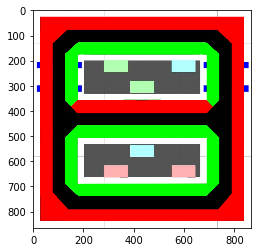

(865, 867, 3)


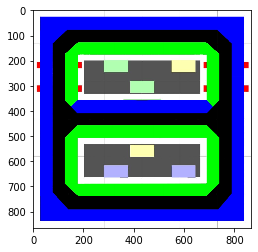

In [7]:
img = cv2.imread("/home/fizzer/Desktop/map_mask.jpg")
plt.imshow(img)
plt.show()
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

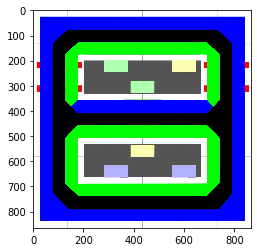

In [8]:
img = img[0:865, 0:865]
plt.imshow(img)

In [40]:
#get xcoord,ycoord
#for now
xcoord = int(865/2)
ycoord = int(865/2)

boundary12 = int(865/2)
boundary34 = 380
boundary23 = 520
boundarymax = 865


In [41]:
#make sections
xright = list(range(boundary12, boundarymax+1))
xleft = list(range(0,boundary12))
ytop = list(range(0, boundary34))
ymiddle = list(range(boundary34, boundary23))
ybot = list(range(boundary23, boundarymax))

test1 = list(range(0,9))
test2 = list(range(3,12))


In [28]:
# section1 = (xright and ybot)
# sectoin2 =(xleft and ybot)
# section3 = (ymiddle)
# section4 = (xleft and ytop)
# section5 = (xright and ytop)
# hello = (test1 and test2)
# print(hello)
# not what i want, but can use as reference

[3, 4, 5, 6, 7, 8, 9, 10, 11]


In [52]:
xcoord = 690
ycoord = 700

section = 'no'
if(ycoord in ymiddle):
    section = '3'
elif(xcoord in xright and ycoord in ybot):
    section = '1'
elif(xcoord in xleft and ycoord in ybot):
    section = '2'
elif (xcoord in xleft and ycoord in ytop):
    section = '4'
else:
    section = 5
print(section)
# print(ycoord)
# print(ymiddle)

1


In [62]:
#getting color:

img_array = img[ycoord,xcoord]
img_list = img_array.tolist()
max_value = max(img_list)
max_index = img_list.index(max_value)

if(max_value == 0):
    color = 'road'
else:
    if(max_index ==2):
        color = 'Bue'
    else:
        color = 'Green'
print(color)

255
1
Green


In [57]:
angle = 0.52

if(angle > 0):
    xorientation = "left"
else:
    xorientation = "right"

if(abs(angle) > math.pi/2):
    yorientation = "down"
if(abs(angle) < math.pi/2):
    yorientation = "up"
print(xorientation)
print(yorientation)


left
up


In [63]:
state_array = []

if (color == 'road'):
    state_array = [0, 1,0]


if (section == '1' or section =='3'):
    if(color == 'blue'):
        if(xorientation == 'left' or yorientation == 'down'):
            state_array = [1, 0, 0]
        else:
            state_array = [0, 0, 1]
    else:
        if(xorientation == 'left' or yorientation == 'down'):
            state_array = [0, 0, 1]
        else:
            state_array = [1, 0, 0]
if(section =='2'):
    if (color == 'blue'):
        if(xorientation =='left' or yorientation =='up'):
            state_array = [1,0,0]
        else:
            state_array = [0,0,1]
    else:
        if(xorientation =='left' or yorientation =='up'):
            state_array = [0,0,1]
        else:
            state_array = [1,0,0]
if (section =='4' or section ==5):
    if (color == 'blue'):
        if(xorientation =='right' or yorientation =='up'):
            state_array = [1,0,0]
        else:
            state_array = [0,0,1]
    else:
        if(xorientation =='left' or yorientation =='up'):
            state_array = [0,0,1]
        else:
            state_array = [1,0,0]